In [11]:
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister, BasicAer
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

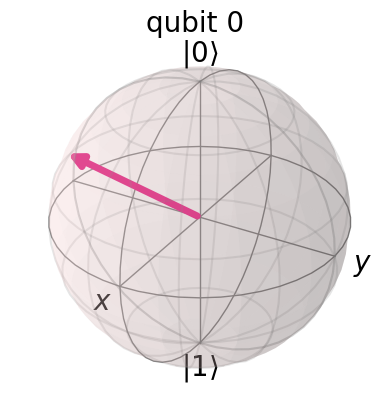

In [43]:
psi = random_statevector(2)
array_to_latex(psi)
plot_bloch_multivector(psi)

In [44]:
init_state = Initialize(psi)  #"Inicializa amplitudes complexas??"
init_state.label = "initial_state"

In [45]:
def create_bell_pair(qc,a,b):
    qc.h(a)
    qc.cx(a,b)

In [46]:
def alice_gates(qc,psi,a):
    qc.cx(psi,a)
    qc.h(psi)    

In [47]:
def measure_and_send(qc,a,b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [48]:
def bob_gates(qc,qubit,crz,crx):
    qc.x(qubit).c_if(crx,1)
    qc.z(qubit).c_if(crz,1)

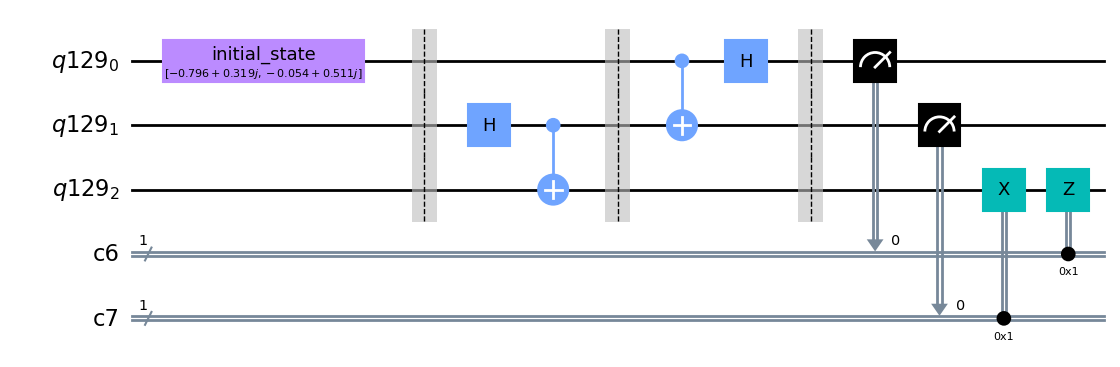

In [49]:
qr = QuantumRegister(3)
crz = ClassicalRegister(1)
crx = ClassicalRegister(1)
qc = QuantumCircuit(qr,crz,crx)

qc.append(init_state,[0])
qc.barrier()

create_bell_pair(qc,1,2)
qc.barrier()

alice_gates(qc,0,1)

measure_and_send(qc,0,1)

bob_gates(qc,2,crz,crx)

qc.draw('mpl')  #pro mpl funcionar você precisa instalar pylatexenc


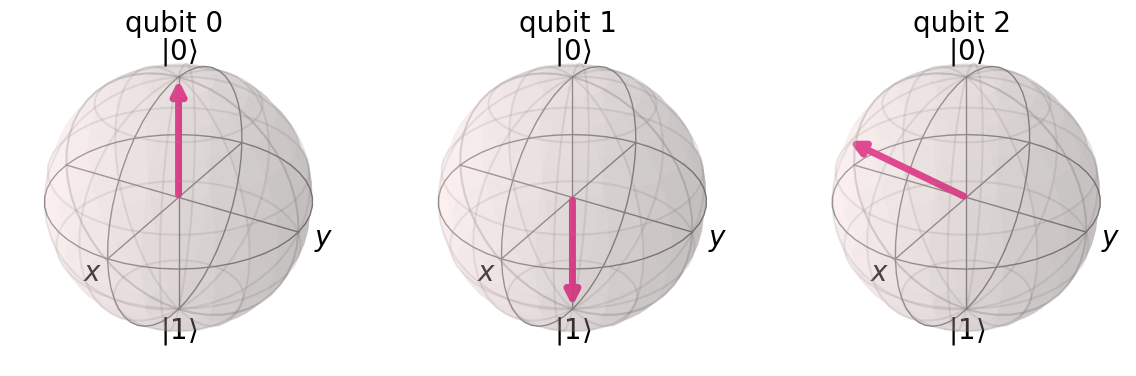

In [61]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result().get_statevector(qc,decimals=3)
result.draw('text')
plot_bloch_multivector(result)